In [43]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga dos dados

In [15]:
wine = pd.read_csv('/content/drive/MyDrive/2026/2026 01/5 -  Projeto de Bloco: Engenharia de Dados: Big Data/dataset_vinhos.csv', sep=';')

In [16]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target,target_label,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,baixa qualidade,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,baixa qualidade,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,baixa qualidade,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,alta qualidade,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0,baixa qualidade,red


In [17]:
wine.shape

(5320, 14)

In [18]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5320.0,7.215179,1.319671,3.80000,6.4000,7.00000,7.70000,15.90000
volatile acidity,5320.0,0.344130,0.168248,0.08000,0.2300,0.30000,0.41000,1.58000
citric acid,5320.0,0.318494,0.147157,0.00000,0.2400,0.31000,0.40000,1.66000
residual sugar,5320.0,5.048477,4.500180,0.60000,1.8000,2.70000,7.50000,65.80000
chlorides,5320.0,0.056690,0.036863,0.00900,0.0380,0.04700,0.06600,0.61100
free sulfur dioxide,5320.0,30.036654,17.805045,1.00000,16.0000,28.00000,41.00000,289.00000
total sulfur dioxide,5320.0,114.109023,56.774223,6.00000,74.0000,116.00000,153.25000,440.00000
density,5320.0,0.994535,0.002966,0.98711,0.9922,0.99465,0.99677,1.03898
pH,5320.0,3.224664,0.160379,2.72000,3.1100,3.21000,3.33000,4.01000
sulphates,5320.0,0.533357,0.149743,0.22000,0.4300,0.51000,0.60000,2.00000


In [19]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target', 'target_label', 'type'],
      dtype='object')

⚠️ Removemos as variáveis categóricas

In [20]:
target = wine['target']

features_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']


wine[features_list].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232


## Pré-processamento

In [21]:
X = wine[features_list]
y = wine['target']

train_f, test_f, train_t, test_t = train_test_split(
  X,
  y,
  train_size=0.8,
  random_state=42,
  stratify=y
)

## Transformação dos dados

### Standard Scaler

In [22]:
scaler = StandardScaler()
scaler.fit(train_f)
norm = scaler.transform(train_f)

O **Standard Scaler** transforma cada valor de forma que a média dos dados padronizados seja zero e o desvio padrão seja igual a um. Essa transformação garante que os dados estejam em uma escala comum.

In [25]:
scaled_features = pd.DataFrame(norm, index=train_f.index, columns=train_f.columns)
scaled_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2483,-0.316485,-0.506185,0.076237,-0.786311,-0.264731,0.808221,0.938178,-0.592510,-0.656640,-0.624492,-0.038158
2052,-0.316485,-0.564767,0.409361,0.672955,-0.291981,-0.337793,0.726802,0.347098,0.642626,0.377533,-0.290020
52,2.266593,0.431114,1.675234,-0.366219,0.362013,-1.483807,-1.827326,0.850460,-1.151598,0.644740,-0.793744
354,1.962702,0.548277,1.008985,-0.565210,0.171265,-1.197304,-1.510262,1.186034,0.085798,0.778344,0.213704
2008,-0.316485,-1.326323,-0.057013,0.031762,-0.319231,-0.051289,0.110288,-0.122706,1.137584,-0.490889,-0.625836


In [27]:
train_f.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2483,6.8,0.26,0.33,1.5,0.047,44.0,167.0,0.9928,3.12,0.44,10.5
2052,6.8,0.25,0.38,8.1,0.046,24.0,155.0,0.9956,3.33,0.59,10.2
52,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.9971,3.04,0.63,9.6
354,9.8,0.44,0.47,2.5,0.063,9.0,28.0,0.9981,3.24,0.65,10.8
2008,6.8,0.12,0.31,5.2,0.045,29.0,120.0,0.9942,3.41,0.46,9.8


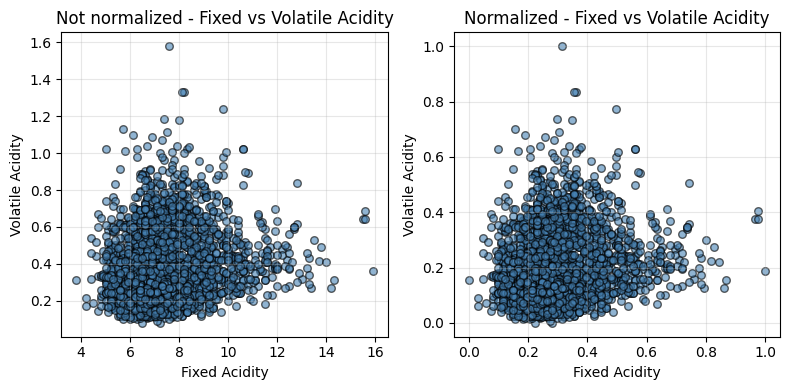

In [61]:
plt.figure(figsize=(8, 4))

# Primeiro plot
plt.subplot(1, 2, 1)
plt.scatter(
    train_f['fixed acidity'],
    train_f['volatile acidity'],
    s=30,
    color='steelblue',
    alpha=0.6,
    edgecolors='k'
)

plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.title('Fixed vs Volatile Acidity')
plt.grid(True, alpha=0.3)

# Segundo plot
plt.subplot(1, 2, 2)
plt.scatter(
    scaled_features['fixed acidity'],
    scaled_features['volatile acidity'],
    s=30,
    color='steelblue',
    alpha=0.6,
    edgecolors='k'
)

plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.title('Scaled - Fixed vs Volatile Acidity')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Min Max Scaler

In [33]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(train_f)
norm = min_max_scaler.transform(train_f)

O Min Max Scaler normaliza os valores baseados em um intervalo inicial, onde utiliza do menor e do maior valor do intervalo para aplicar a fórmula:

X_scaled = (X - X_min) / (X_max - X_min)

In [34]:
min_max_features = pd.DataFrame(norm, index=train_f.index, columns=train_f.columns)
min_max_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2483,0.247934,0.120000,0.198795,0.012289,0.063123,0.295533,0.446602,0.109697,0.310078,0.108571,0.362319
2052,0.247934,0.113333,0.228916,0.113671,0.061462,0.158076,0.413315,0.163678,0.472868,0.194286,0.318841
52,0.528926,0.226667,0.343373,0.041475,0.101329,0.020619,0.011096,0.192597,0.248062,0.217143,0.231884
354,0.495868,0.240000,0.283133,0.027650,0.089701,0.054983,0.061026,0.211876,0.403101,0.228571,0.405797
2008,0.247934,0.026667,0.186747,0.069124,0.059801,0.192440,0.316227,0.136688,0.534884,0.120000,0.260870


In [35]:
train_f.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2483,6.8,0.26,0.33,1.5,0.047,44.0,167.0,0.9928,3.12,0.44,10.5
2052,6.8,0.25,0.38,8.1,0.046,24.0,155.0,0.9956,3.33,0.59,10.2
52,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.9971,3.04,0.63,9.6
354,9.8,0.44,0.47,2.5,0.063,9.0,28.0,0.9981,3.24,0.65,10.8
2008,6.8,0.12,0.31,5.2,0.045,29.0,120.0,0.9942,3.41,0.46,9.8


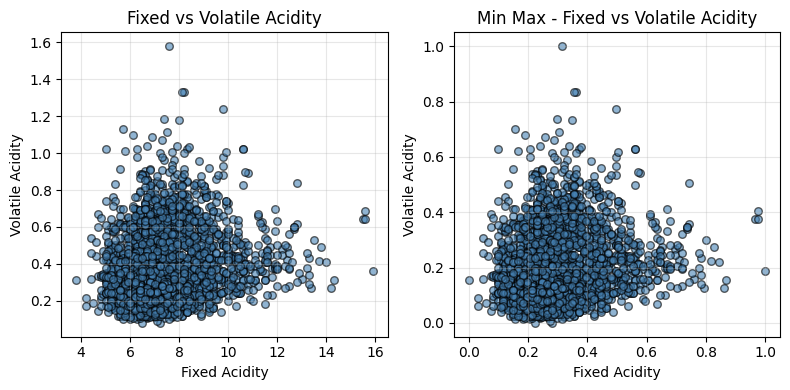

In [62]:
plt.figure(figsize=(8, 4))

# Primeiro plot
plt.subplot(1, 2, 1)
plt.scatter(
    train_f['fixed acidity'],
    train_f['volatile acidity'],
    s=30,
    color='steelblue',
    alpha=0.6,
    edgecolors='k'
)

plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.title('Fixed vs Volatile Acidity')
plt.grid(True, alpha=0.3)

# Segundo plot
plt.subplot(1, 2, 2)
plt.scatter(
    min_max_features['fixed acidity'],
    min_max_features['volatile acidity'],
    s=30,
    color='steelblue',
    alpha=0.6,
    edgecolors='k'
)

plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.title('Min Max - Fixed vs Volatile Acidity')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Log

In [40]:
log_transformer = np.log1p(train_f)

scaler = StandardScaler()
log_scaler = scaler.fit(log_transformer)
norm = log_scaler.transform(log_transformer)

O **log** reduz a diferença relativa entre valores grandes e pequenos e a assimetria da distribuição dentro do dataset. Após sua aplicação, é preciso utilizar um método de normalização, como Standard Scaler ou Min Max Scaler.

In [41]:
log_scaler_features = pd.DataFrame(norm, index=train_f.index, columns=train_f.columns)
log_scaler_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2483,-0.274756,-0.499422,0.132812,-0.989292,-0.270792,0.853955,0.803598,-0.592368,-0.649573,-0.637926,0.012235
2052,-0.274756,-0.566841,0.458277,0.969629,-0.300555,-0.038654,0.698919,0.347956,0.657405,0.442060,-0.249001
52,2.174395,0.512046,1.595869,-0.132157,0.406013,-2.482737,-3.047043,0.851159,-1.165075,0.712855,-0.793147
354,1.928203,0.630384,1.015457,-0.479129,0.201581,-1.430128,-1.677740,1.186417,0.105208,0.845770,0.266742
2008,-0.274756,-1.495982,-0.000813,0.387820,-0.330346,0.238218,0.340045,-0.122041,1.138695,-0.487594,-0.608416


In [42]:
train_f.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2483,6.8,0.26,0.33,1.5,0.047,44.0,167.0,0.9928,3.12,0.44,10.5
2052,6.8,0.25,0.38,8.1,0.046,24.0,155.0,0.9956,3.33,0.59,10.2
52,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.9971,3.04,0.63,9.6
354,9.8,0.44,0.47,2.5,0.063,9.0,28.0,0.9981,3.24,0.65,10.8
2008,6.8,0.12,0.31,5.2,0.045,29.0,120.0,0.9942,3.41,0.46,9.8


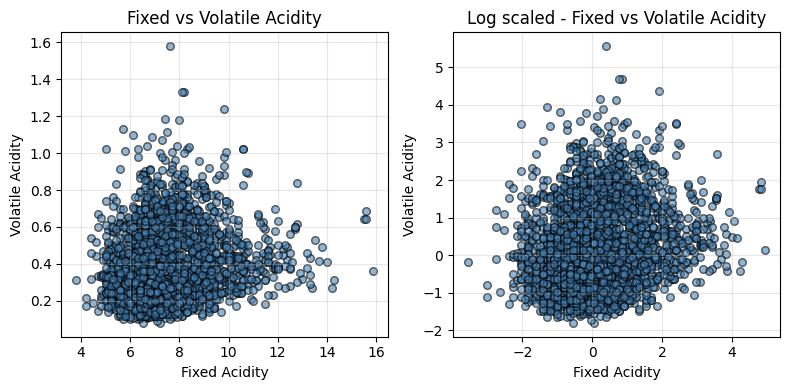

In [63]:
plt.figure(figsize=(8, 4))

# Primeiro plot
plt.subplot(1, 2, 1)
plt.scatter(
    train_f['fixed acidity'],
    train_f['volatile acidity'],
    s=30,
    color='steelblue',
    alpha=0.6,
    edgecolors='k'
)

plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.title('Fixed vs Volatile Acidity')
plt.grid(True, alpha=0.3)

# Segundo plot
plt.subplot(1, 2, 2)
plt.scatter(
    log_scaler_features['fixed acidity'],
    log_scaler_features['volatile acidity'],
    s=30,
    color='steelblue',
    alpha=0.6,
    edgecolors='k'
)

plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.title('Log scaled - Fixed vs Volatile Acidity')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
